In [5]:
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
df = pd.read_csv("F:\Assignments\Decision Trees\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


## Data Visualizaion

In [11]:
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')

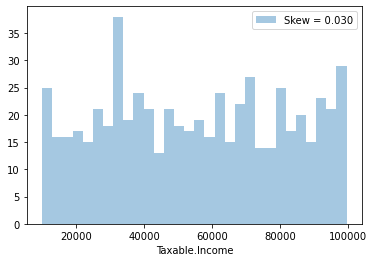

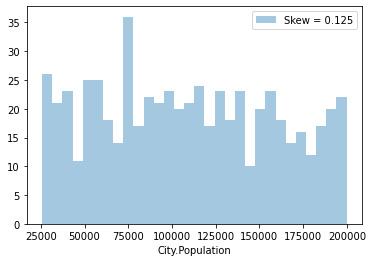

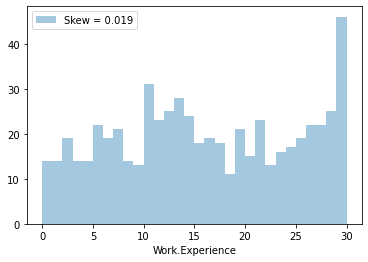

In [13]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Figure size 576x576 with 0 Axes>

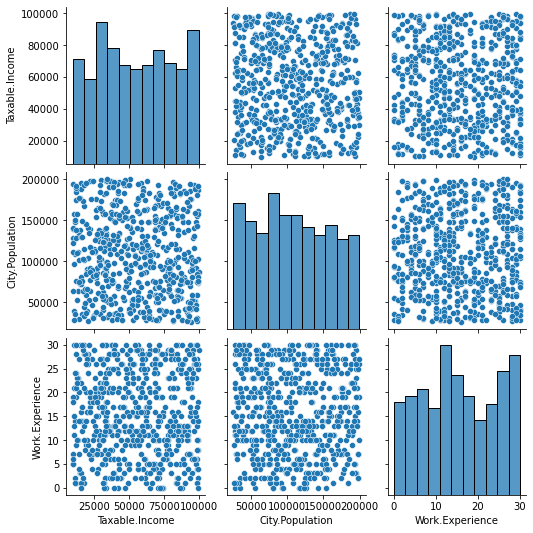

In [14]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

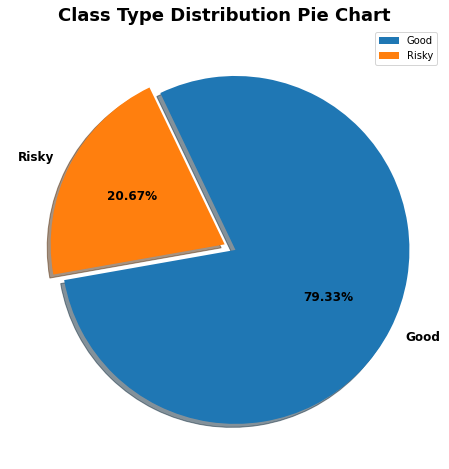

In [15]:
plt.figure(figsize = (12,8))
plt.pie(df1['taxable_category'].value_counts(),
       labels=df1.taxable_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [16]:
import category_encoders as ce

In [21]:
# Encoding variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
fraud1 = encoder.fit_transform(df)

In [22]:

# Converting the Target column i.e. Taxable Income into Categorical value 
tax_val = []
for value in df["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
fraud1["tax_val"]= tax_val

In [23]:
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good


In [24]:
# Splitting input & output variables
x = fraud1.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud1['tax_val']

In [25]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2


In [26]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: tax_val, dtype: object

In [27]:
y.value_counts()

Good     476
Risky    124
Name: tax_val, dtype: int64

In [28]:
# Splitting the data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

### Decision Tree Classifier using Entropy 

In [29]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [30]:

#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test))
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


In [31]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test))
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train))

Test data Accuracy is: 0.7722222222222223
Train data Accuracy is: 0.8047619047619048


In [33]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

Test data Accuracy is: 0.7611111111111111
Train data Accuracy is: 0.8119047619047619


In [35]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
#Predicting on test data
pred_test4 = model4.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test4==y_test))
#Predicting on train data
pred_train4 = model4.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train4==y_train))

Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.8166666666666667


Text(0.5, 1.0, 'Decision tree using Entropy')

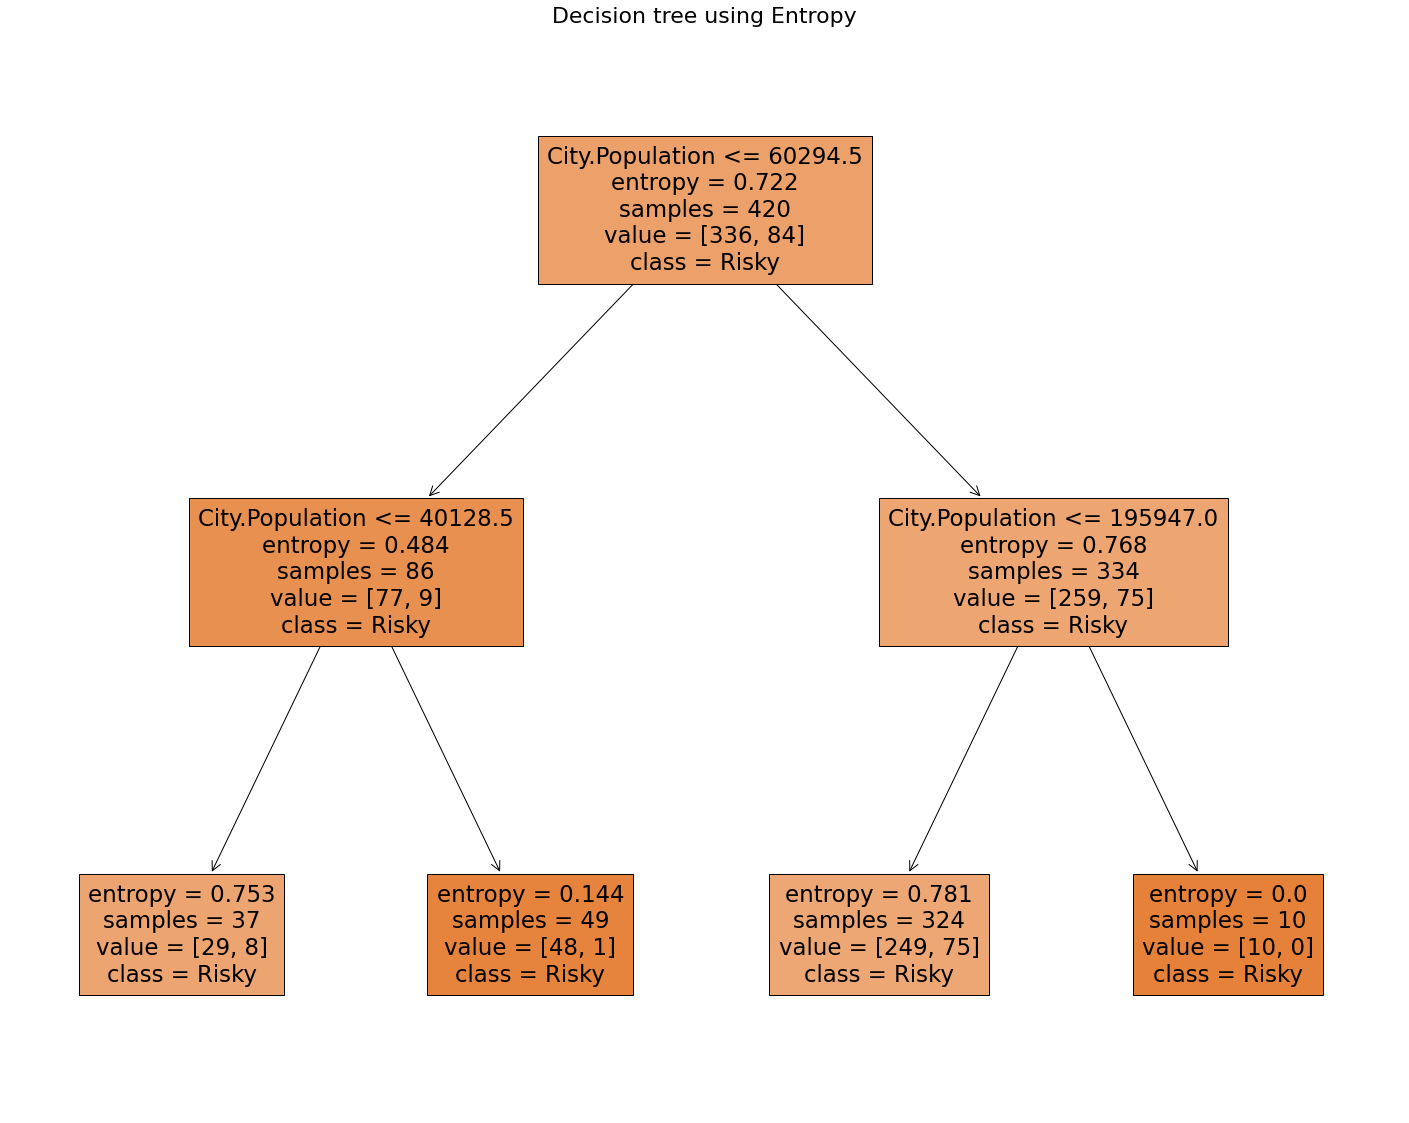

In [37]:
# Plotting the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

### using Gini Criteria

In [38]:
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [39]:

#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


In [40]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test))
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


In [42]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test))
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train))

Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.8142857142857143


Text(0.5, 1.0, 'Decision tree using Gini')

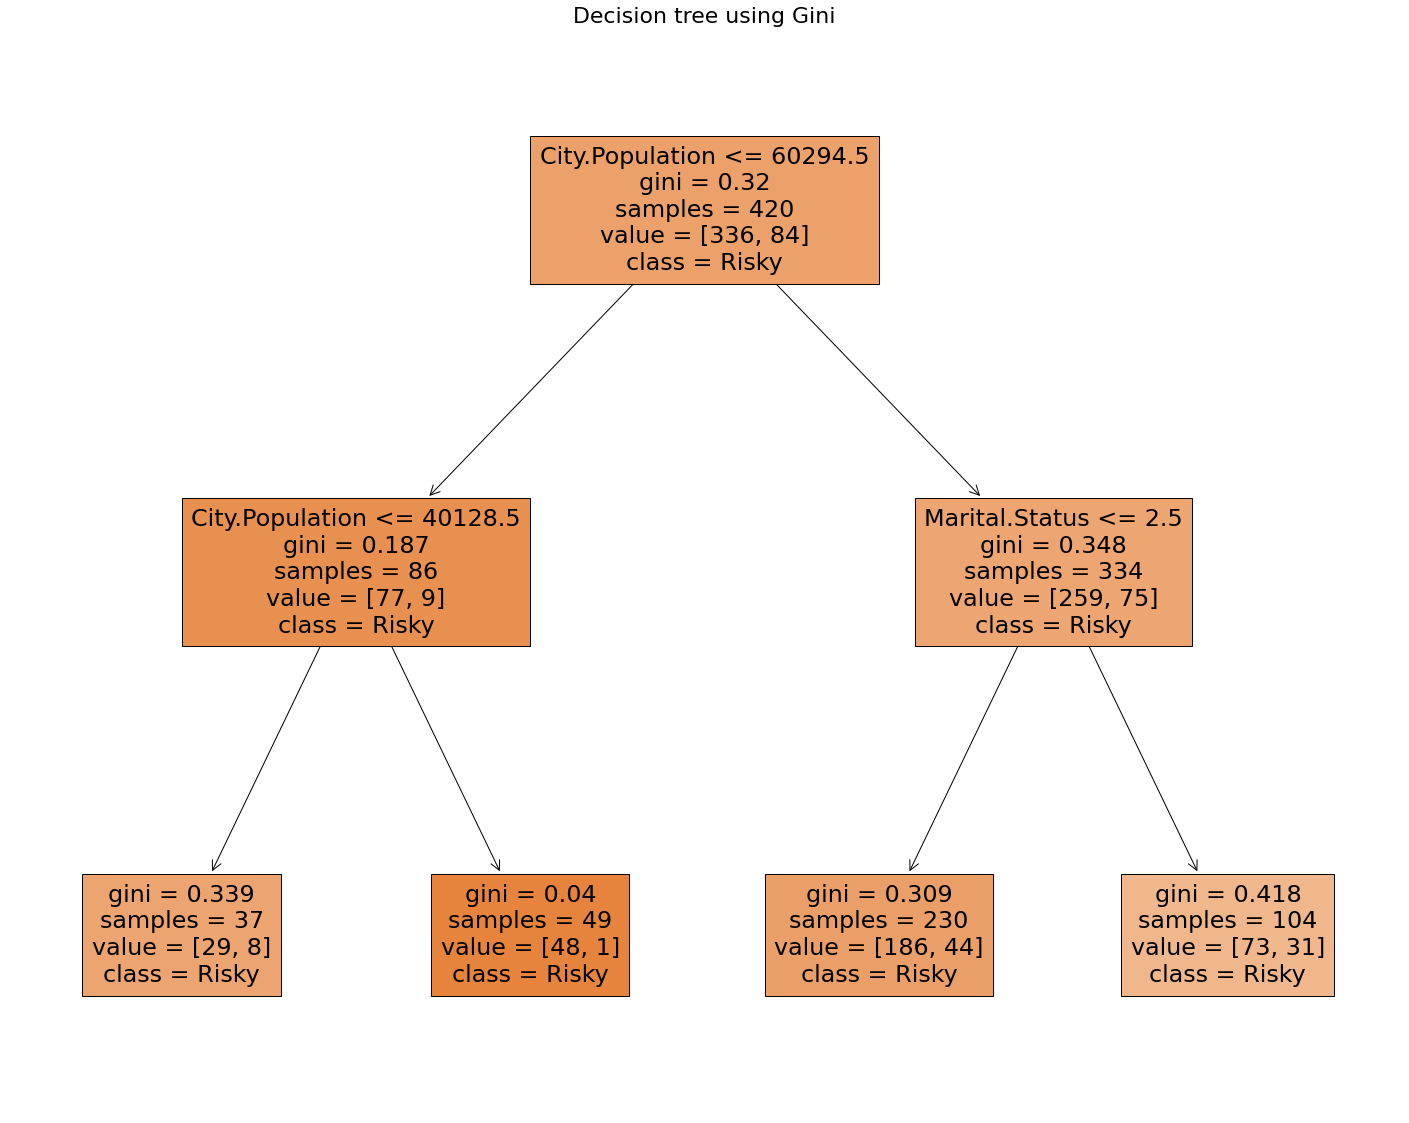

In [44]:
# Plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini1,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

In [45]:
# most important feature affecting the class is City Population